# Higgs decay to two photons
<hr style="border-top-width: 4px; border-top-color: #34609b;">
The Standard Model predicted the decay of the [Higgs bosons](https://en.wikipedia.org/wiki/Higgs_boson) into photons. THe process is depicted by the diagrams below:
<img src="../images/Hgg.gif" alt="Hgg" style="width: 500px;"/>
At the [Large Hadron Collider](https://en.wikipedia.org/wiki/Large_Hadron_Collider), this process has been measured. This figure shows how an Higgs boson decay looks in the CMS detector:
<img src="../images/CMSHiggsgg.png" alt="CMSHgg" style="width: 500px;"/>
This ROOTbook illustrates a simplified fitting procedure aiming to identify the peak due to the Higgs boson decay over the exponentially falling background.

## Importing input data into a ROOT file
First of all we import the input data, here simplistically stored into a text file, into a [ROOT file](https://root.cern.ch/doc/master/classTFile.html).

In [1]:
TTree tree("HiggsTree","The tree cont");
auto nevt = tree.ReadFile("Hgg.txt","x");
if (nevt <= 0) { 
    Error("fitHgg","Error reading data from input file ");
    }
std::cout << "Read " << nevt << " events from the file." << std::endl;

Read 30770 events from the file.


## Modelling the distributions with RooFit
[ROOT](www.root.cern.ch) provides a tool for *rich modelling* of statistical distributions: [RooFit](https://root.cern.ch/roofit-20-minutes). We now create a RooFit model using the [RooWorkspace](https://root.cern.ch/doc/master/classRooWorkspace.html) factory: a tool which allow to express complex entities with a convenient syntax.

In [3]:
RooWorkspace w("Workspace for the Higgs fit");
w.factory("x[110,160]");  // invariant mass

// Backround Model
w.factory("nbackground[10000, 0, 10000]");
w.var("nbackground")->setVal(nevt);
w.var("nbackground")->setMin(0.1*nevt);
w.var("nbackground")->setMax(10*nevt);

// Create exponential distribution characterised by two components
w.factory("a1[ 7.5, -500, 500]");
w.factory("a2[-1.5, -500, 500]");
w.factory("expr::z('-(a1*x/100 + a2*(x/100)^2)', a1, a2, x)");
w.factory("Exponential::bmodel(z, 1)");

// Signal Model
w.factory("nsignal[100, 0.0, 1000.0]");
w.factory("mass[130, 110, 150]");
w.factory("width[1, 0.5, 5]");
w.factory("Gaussian::smodel(x, mass, width)");

// Signal + Background Model
w.factory("SUM::model(nbackground*bmodel, nsignal*smodel)");


RooFit v3.60 -- Developed by Wouter Verkerke and David Kirkby 
                Copyright (C) 2000-2013 NIKHEF, University of California & Stanford University
                All rights reserved, please read http://roofit.sourceforge.net/license.txt



Extract the signal and signal+background model from the workspace:

In [4]:
auto smodel = w.pdf("smodel");
auto model = w.pdf("model");
auto x = w.var("x");

We create now the RooFit data set importing the data from the ROOT tree

In [5]:
RooDataSet data("data","data",*x,RooFit::Import(tree) )

[#1] INFO:Eval -- RooAbsReal::attachToTree(x) TTree Float_t branch x will be converted to double precision
(RooDataSet &) Name: data Title: data


The workspace can be printed on screen: this is very useful to inspect the models created.

In [6]:
w.Print();


RooWorkspace(Workspace for the Higgs fit) Workspace for the Higgs fit contents

variables
---------
(a1,a2,mass,nbackground,nsignal,width,x)

p.d.f.s
-------
RooExponential::bmodel[ x=z c=1 ] = 0.000616625
RooAddPdf::model[ nbackground * bmodel + nsignal * smodel ] = 0.000610556
RooGaussian::smodel[ x=x mean=mass sigma=width ] = 3.72665e-06

functions
--------
RooFormulaVar::z[ actualVars=(a1,a2,x) formula="-(a1*x/100+a2*(x/100)^2)" ] = -7.39125



## Fit of the Data
The fitting procedure results in quite some output. It is important to learn how to read the output of a fit, for example the value of the parameters, their uncertainties, the correlation matrix and the status of the fitting procedure.

** Be patient: the fit is unbinned and can take a while **

In [7]:
auto r = model->fitTo(data, RooFit::Minimizer("Minuit"),RooFit::Save(true), RooFit::Offset(true));

[#1] INFO:Minization -- p.d.f. provides expected number of events, including extended term in likelihood.
[#1] INFO:NumericIntegration -- RooRealIntegral::init(bmodel_Int[x]) using numeric integrator RooIntegrator1D to calculate Int(x)
[#1] INFO:Minization -- RooMinimizer::optimizeConst: activating const optimization
[#1] INFO:NumericIntegration -- RooRealIntegral::init(bmodel_Int[x]) using numeric integrator RooIntegrator1D to calculate Int(x)
[#1] INFO:Minization --  The following expressions will be evaluated in cache-and-track mode: (bmodel,smodel)
 **********
 **    1 **SET PRINT           1
 **********
 **********
 **    2 **SET NOGRAD
 **********
 PARAMETER DEFINITIONS:
    NO.   NAME         VALUE      STEP SIZE      LIMITS
     1 a1           7.50000e+00  1.00000e+02   -5.00000e+02  5.00000e+02
     2 a2          -1.50000e+00  1.00000e+02   -5.00000e+02  5.00000e+02
     3 mass         1.30000e+02  4.00000e+00    1.10000e+02  1.50000e+02
     4 nbackground   1.00000e+04  3.461

## Visualisation of the Result


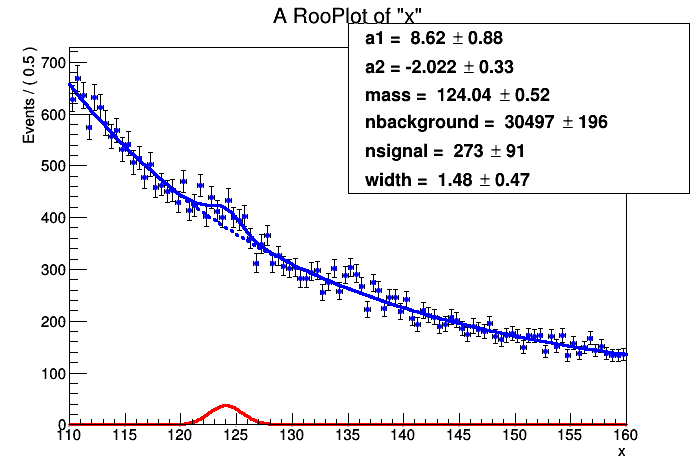

[#1] INFO:NumericIntegration -- RooRealIntegral::init(bmodel_Int[x]) using numeric integrator RooIntegrator1D to calculate Int(x)
[#1] INFO:Plotting -- RooAbsPdf::plotOn(model) directly selected PDF components: (bmodel)
[#1] INFO:Plotting -- RooAbsPdf::plotOn(model) indirectly selected PDF components: (z)
[#1] INFO:NumericIntegration -- RooRealIntegral::init(bmodel_Int[x]) using numeric integrator RooIntegrator1D to calculate Int(x)
[#1] INFO:Plotting -- RooAbsPdf::plotOn(model) directly selected PDF components: (smodel)
[#1] INFO:Plotting -- RooAbsPdf::plotOn(model) indirectly selected PDF components: ()
[#1] INFO:NumericIntegration -- RooRealIntegral::init(bmodel_Int[x]) using numeric integrator RooIntegrator1D to calculate Int(x)


In [8]:
auto plot = x->frame();
data.plotOn(plot);
model->plotOn(plot);
model->plotOn(plot, RooFit::Components("bmodel"),RooFit::LineStyle(kDashed));
model->plotOn(plot, RooFit::Components("smodel"),RooFit::LineColor(kRed));
model->paramOn(plot);

TCanvas c;
plot->Draw();
c.Draw();

## Persistification of the Model on Disk
The ROOT I/O is used to write on disk full RooFit models in order to ease their sharing among scientists, also from different experiments - this establishes an important common language which allows to compare and combine analyses.

In [ ]:
w.writeToFile("HiggsModel.root",true);